<a href="https://colab.research.google.com/github/nedokormysh/GB_intro_Molecular_Biology_Genetics/blob/lesson6/GB_MolBio_Gen_hw_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Bioinformatics Code
# The code is provided in a user compatible format, allowing for the addition of other datasets.

# #Bowtie 2.3.4.3
# #SAMtools 1.9
# #Bcftools 1.9
# #Bismark 0.20.0

Повторно выполнить задание к 4 занятию / повторно выполнить задание к 5 занятию / повторить выполнение исследования из статьи.

Было предложено исследование. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6560734/

Применение машинного обучения для классификация пациентов с диабетом, используя новые сердечные биомаркеры и интегративной геномики.


У нас нет данных о каждом пациенте. Поэтому полностью провести повторение эксперимента мы не можем.

Но у нас есть https://github.com/qahathaway/WVU_Machine-Learning-50/blob/master/Bioinformatics_Code

У нас есть результаты экспериментов по митохондриальной днк. Собственно, мы хотим получить SNP.





# Загрузка данных.

Установим conda. Правда после этого потребуется перезагрузка ядра.

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:16
🔁 Restarting kernel...


In [ ]:
!conda --version

conda 23.1.0


Установим приложения.

In [ ]:
!sudo apt install bwa samtools fastqc bowtie2 gffread bcftools > /dev/null



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 130.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Установим датасеты из ncbi.

In [ ]:
!conda install -q -c conda-forge ncbi-datasets-cli

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - ncbi-datasets-cli


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boltons-23.0.0             |     pyhd8ed1ab_0         296 KB  conda-forge
    ca-certificates-2023.5.7   |       hbcca054_0         145 KB  conda-forge
    certifi-2023.5.7           |     pyhd8ed1ab_0         149 KB  conda-forge
    conda-23.3.1               |  py310hff52083_0         941 KB  conda-forge
    jsonpatch-1.32             |     pyhd8ed1ab_0          14 KB  conda-forge
    jsonpointer-2.0            |             py_0           9 KB  conda-forge
    ncbi-datasets-cli-15.6.1   |       ha770c72_0        11.6 MB  conda-forge
    openssl-3.1.1              |       hd590300_1         2.5 MB  conda-forge
    packaging-23.1             |     pyhd8ed1ab_0          45 KB  conda-forge
    --

Убрать логи не получилось.

Скачаем референсный геном.

In [ ]:
!datasets download genome accession GCF_000001405.40 --include gtf,gff3,genome,seq-report --filename GCF_000001405.40.zip
!unzip -q /content/GCF_000001405.40.zip

Streaming output truncated to the last 5000 lines.
Downloading: GCF_000001405.40.zip    521MB 26.2MB/s
Downloading: GCF_000001405.40.zip    522MB 26.2MB/s
Downloading: GCF_000001405.40.zip    522MB 26.2MB/s
Downloading: GCF_000001405.40.zip    522MB 26.2MB/s
Downloading: GCF_000001405.40.zip    522MB 26.2MB/s
Downloading: GCF_000001405.40.zip    523MB 26.2MB/s
Downloading: GCF_000001405.40.zip    523MB 26.2MB/s
Downloading: GCF_000001405.40.zip    523MB 26.2MB/s
Downloading: GCF_000001405.40.zip    523MB 26.2MB/s
Downloading: GCF_000001405.40.zip    524MB 26.2MB/s
Downloading: GCF_000001405.40.zip    524MB 26.2MB/s
Downloading: GCF_000001405.40.zip    524MB 26.2MB/s
Downloading: GCF_000001405.40.zip    525MB 26.2MB/s
Downloading: GCF_000001405.40.zip    525MB 26.2MB/s
Downloading: GCF_000001405.40.zip    525MB 26.2MB/s
Downloading: GCF_000001405.40.zip    525MB 26.2MB/s
Downloading: GCF_000001405.40.zip    526MB 26.2MB/s
Downloading: GCF_000001405.40.zip    526MB 26.2MB/s
Downloading: 

In [ ]:
# !datasets download genome accession GCF_000001405.40 --include gff3,rna,cds,protein,genome,seq-report --filename GCF_000001405.40.zip

Получим риды для первого сэмпла с сайта ENA.

In [ ]:
!wget -q -nc ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR852/008/SRR8528698/SRR8528698_1.fastq.gz
!wget -q -nc ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR852/008/SRR8528698/SRR8528698_2.fastq.gz

In [ ]:
!mkdir inputs
# !mkdir outputs
!mv /content/ncbi_dataset/data/GCF_000001405.40/GCF_000001405.40_GRCh38.p14_genomic.fna /content/inputs
!mv /content/ncbi_dataset/data/GCF_000001405.40/genomic.gtf /content/inputs
!mv /content/SRR8528698_1.fastq.gz /content/inputs
!mv /content/SRR8528698_2.fastq.gz /content/inputs
!gunzip /content/inputs/SRR8528698_1.fastq.gz
!gunzip /content/inputs/SRR8528698_2.fastq.gz
!rm /content/GCF_000001405.40.zip
!rm -R /content/ncbi_dataset

У нас используется двустороннее секвенирование.

In [ ]:
reads_1 = '/content/inputs/SRR8528698_1.fastq'
reads_2 = '/content/inputs/SRR8528698_2.fastq'
reference ='/content/inputs/GCF_000001405.40_GRCh38.p14_genomic.fna'
annotation ='/content/inputs/genomic.gtf'

In [ ]:
!mkdir outputs
%cd outputs
!mkdir fastqc
!mkdir bowtie
!mkdir bowtie/bowtie_ref
!mkdir bowtie/bowtie_bam
!mkdir samtools

# !mkdir baw
# !mkdir STAR
# %cd /content/outputs/fastqc

/content/outputs


# Оценка качества ридов при помощи fastqc

Возьмём риды в одном направлении и проверим их качество.

In [ ]:
!fastqc /content/inputs/SRR8528698_1.fastq

Started analysis of SRR8528698_1.fastq
Approx 5% complete for SRR8528698_1.fastq
Approx 10% complete for SRR8528698_1.fastq
Approx 15% complete for SRR8528698_1.fastq
Approx 20% complete for SRR8528698_1.fastq
Approx 25% complete for SRR8528698_1.fastq
Approx 30% complete for SRR8528698_1.fastq
Approx 35% complete for SRR8528698_1.fastq
Approx 40% complete for SRR8528698_1.fastq
Approx 45% complete for SRR8528698_1.fastq
Approx 50% complete for SRR8528698_1.fastq
Approx 55% complete for SRR8528698_1.fastq
Approx 60% complete for SRR8528698_1.fastq
Approx 65% complete for SRR8528698_1.fastq
Approx 70% complete for SRR8528698_1.fastq
Approx 75% complete for SRR8528698_1.fastq
Approx 80% complete for SRR8528698_1.fastq
Approx 85% complete for SRR8528698_1.fastq
Approx 90% complete for SRR8528698_1.fastq
Approx 95% complete for SRR8528698_1.fastq
Analysis complete for SRR8528698_1.fastq


In [ ]:
!mv /content/inputs/SRR8528698_1_fastqc.html /content/outputs/fastqc
!mv /content/inputs/SRR8528698_1_fastqc.zip /content/outputs/fastqc

## Basic statistics

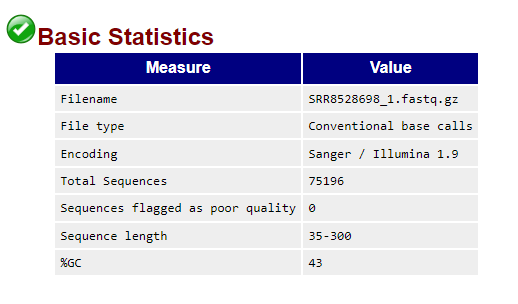

Плохих считываний нет. Есть разброс в длине ридов.

## Per base sequence quality.

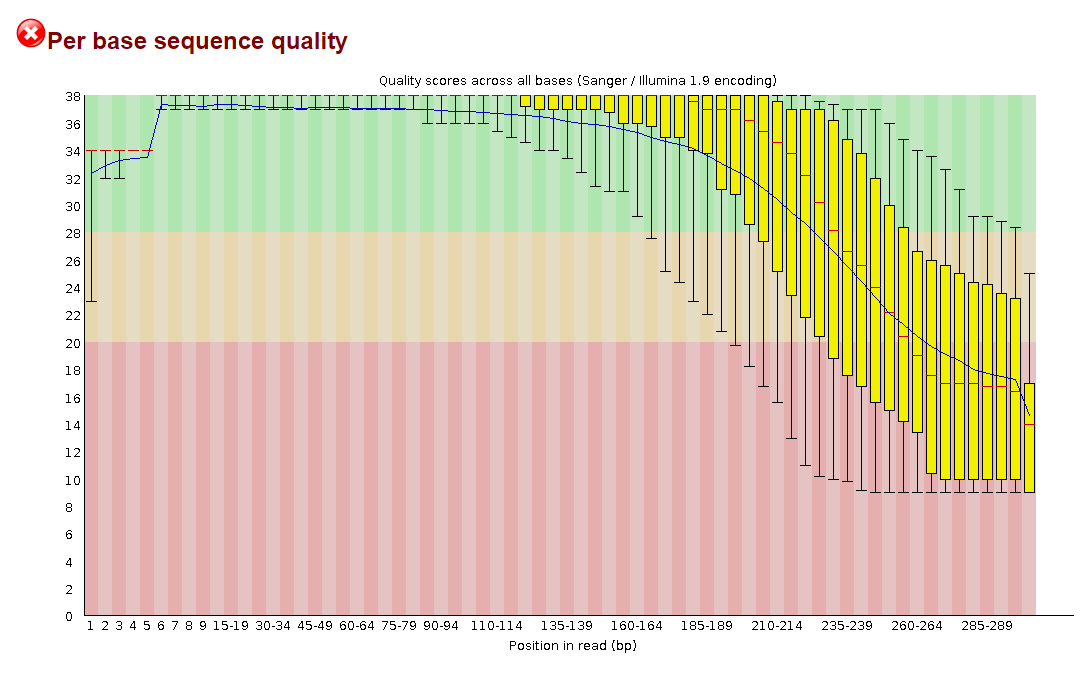

К концу считывания последовательностей у нас всё становится совсем плохо. Но возможно это компенсируется тем, что у нас есть считывания с обратной стороны.

## Per sequence quality scores

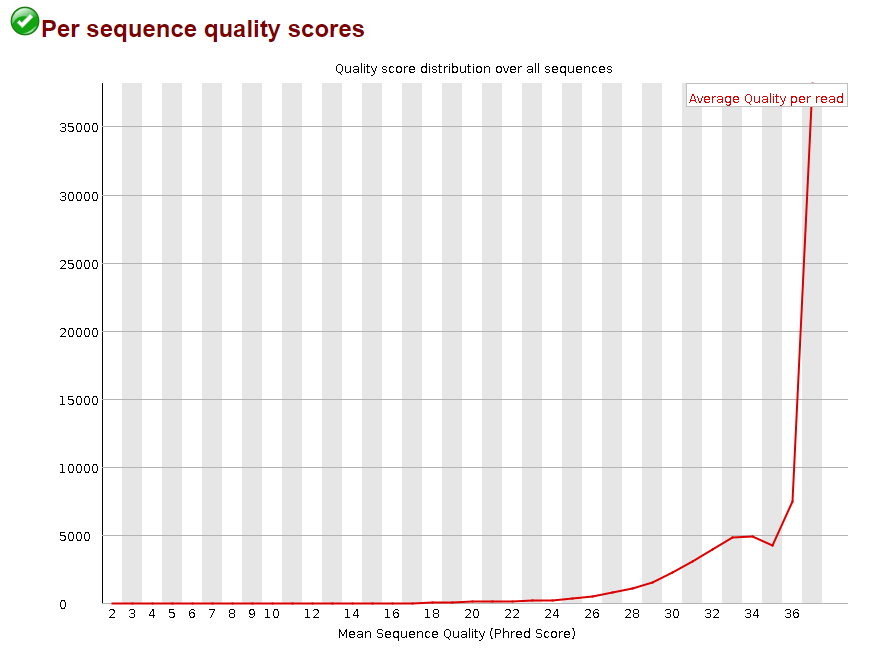

Среднее качество у большей части ридов: 37. Результаты секвенирования в основном сосредоточены на высоких баллах, что доказывает хорошее качество секвенирования.

## Per base sequence content

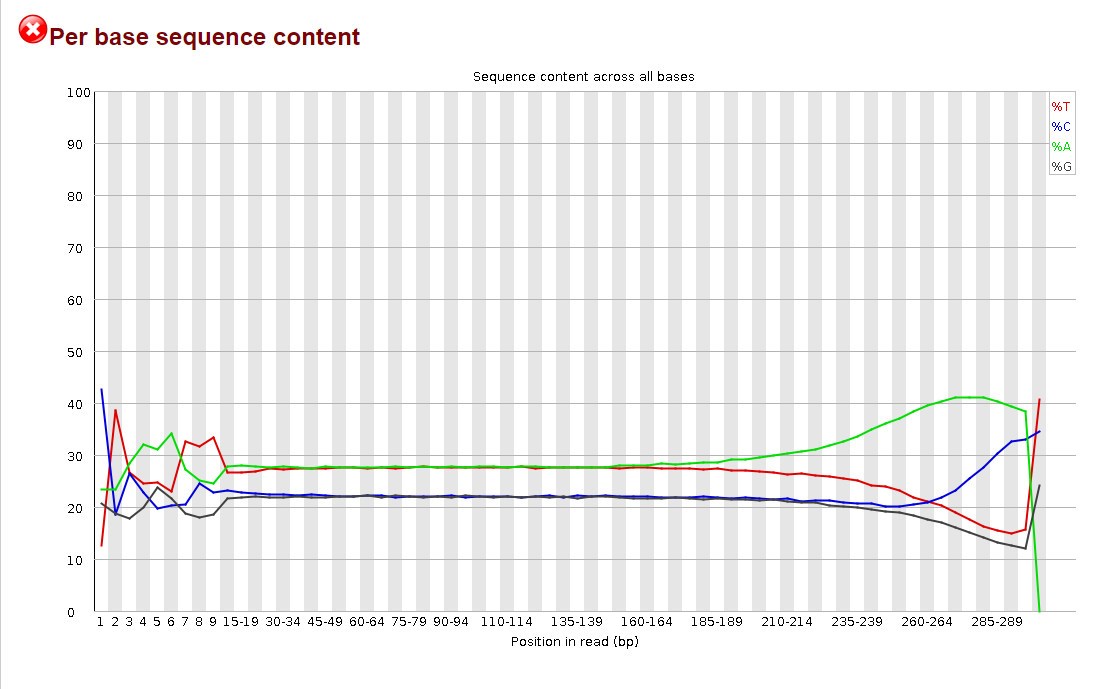

Из графика видно, что в начале и в конце последовательностей процент оснований нестабилен. (A != T, G != C). Т.е. в целом я бы вырезал начало до 10-го основания и в конце с 200-го основания.

## Per sequence GC content

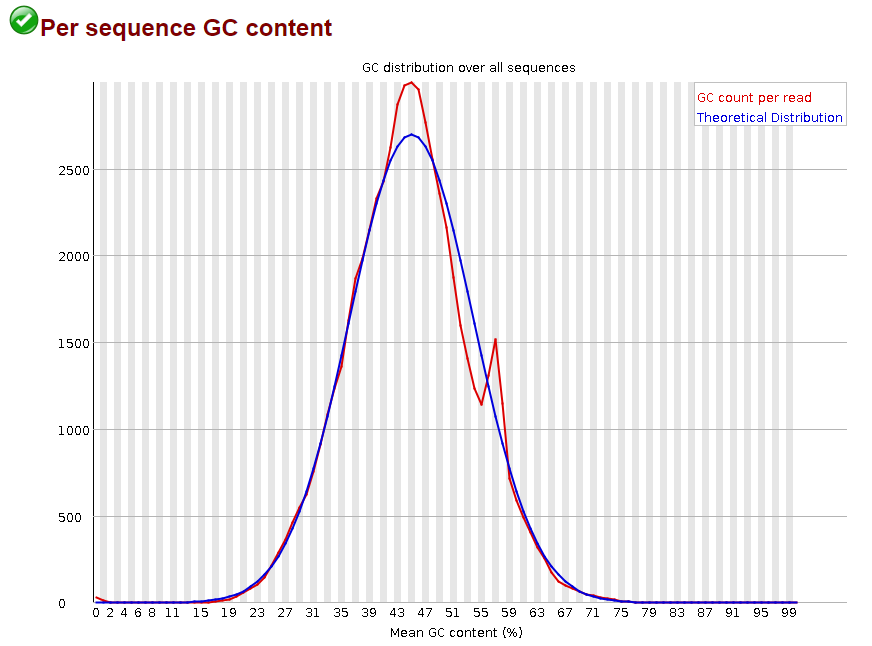

Вообще вроде как тут есть лишний пик, т.е. возможно загрязнение. Но при этом программа оценивает, что всё нормально. Так что возможно я ошибаюсь.

## Per base N content

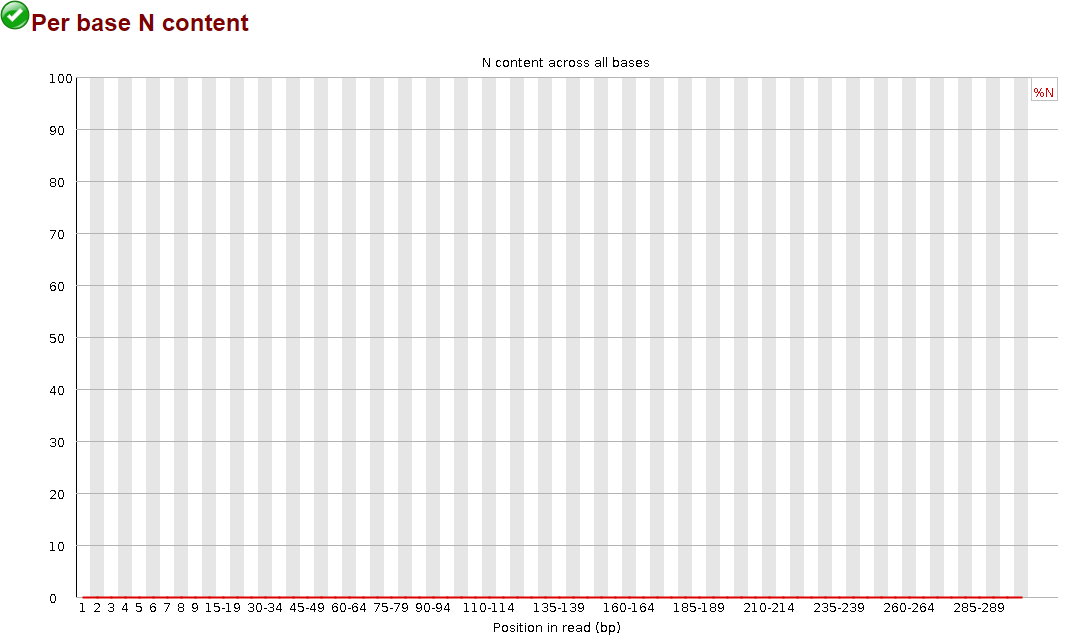

Непрочитанных нет.

## Sequence Length Distribution

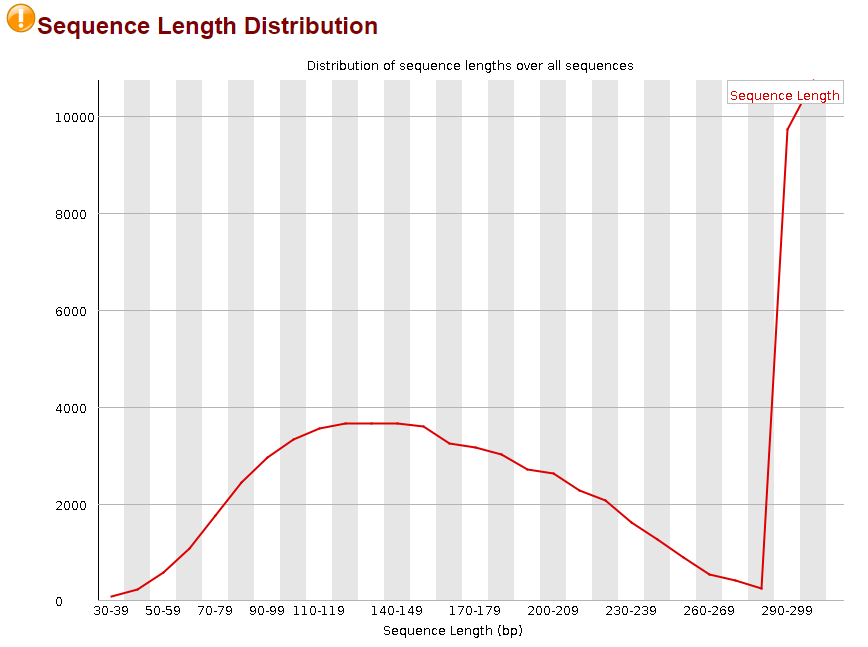

Тут всё достаточно плохо. Большой разброс по длине ридов.

## Sequence Duplication Levels

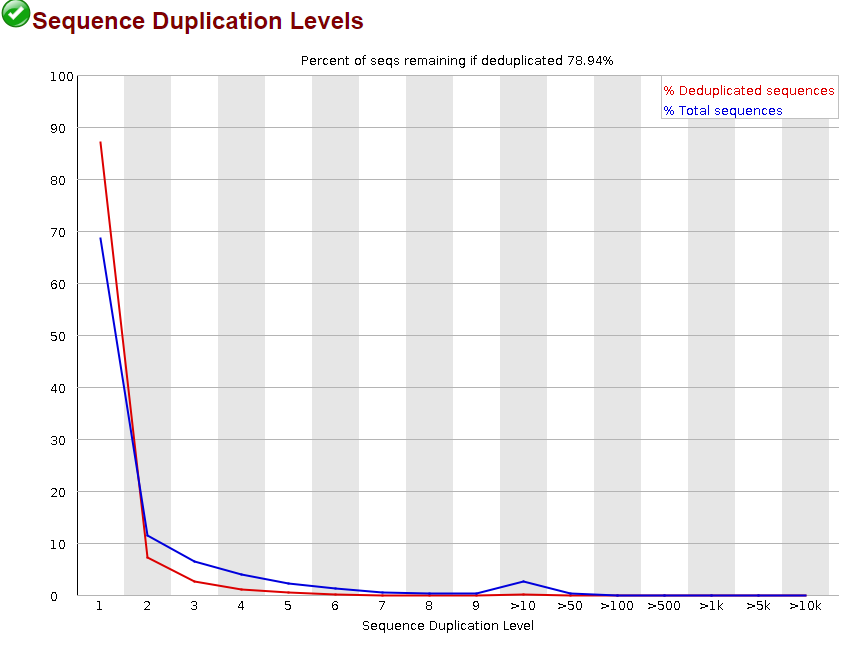

Здесь вроде бы не такой большой процент ридов повторяется.

## Overrepresented sequences

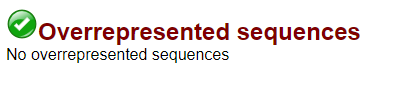

## Adapter Content

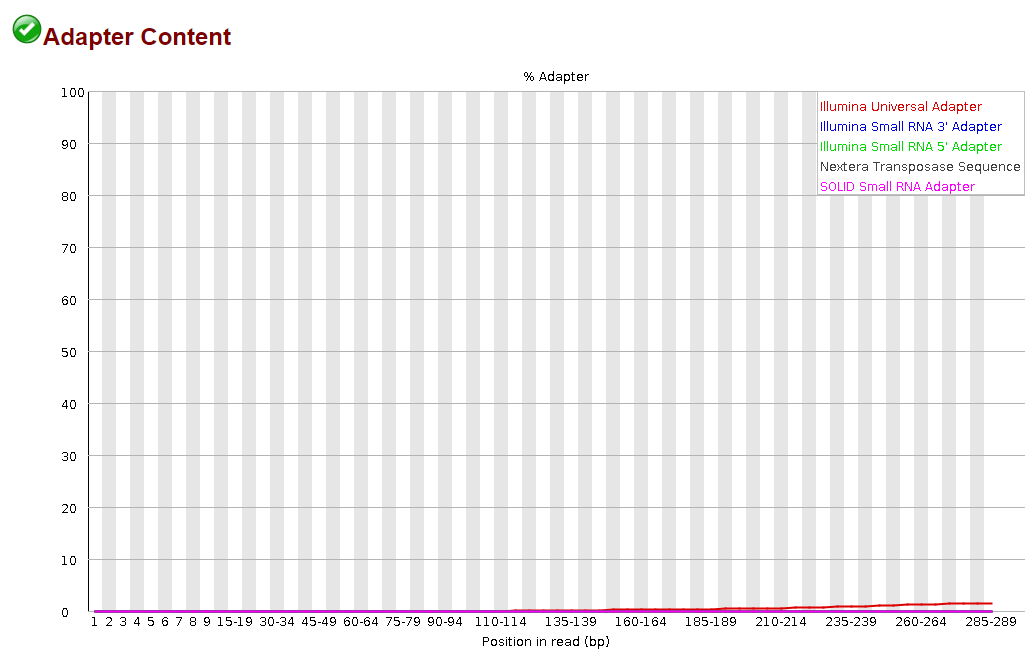

В принципе, не до конца очищены адаптеры. Особенно после 210-ого основания.

# Выравнивание.

## Собираем геном.

Эта часть заняла 10 часов, а я не выключил логи. Но перезапустить не успею, поэтому лучше просто закрыть output.

In [ ]:
%%time

##Mitochondrial SNPs##
#Build the reference genome
!bowtie2-build --threads 20 --bmax 4096 $reference '/content/outputs/bowtie/bowtie_ref' --quiet

Traceback (most recent call last):
  File "/usr/bin/bowtie2-build", line 85, in <module>
    main()
  File "/usr/bin/bowtie2-build", line 82, in main
    sys.exit(subprocess.call(list(argv)))
  File "/usr/lib/python3.10/subprocess.py", line 347, in call
    return p.wait(timeout=timeout)
  File "/usr/lib/python3.10/subprocess.py", line 1209, in wait
    return self._wait(timeout=timeout)
  File "/usr/lib/python3.10/subprocess.py", line 1959, in _wait
    (pid, sts) = self._try_wait(0)
  File "/usr/lib/python3.10/subprocess.py", line 1917, in _try_wait
    (pid, sts) = os.waitpid(self.pid, wait_flags)
KeyboardInterrupt
^C
CPU times: user 3min 24s, sys: 23.6 s, total: 3min 47s
Wall time: 6h 42min 46s



## Индексирование файлов генома.

In [ ]:
#Index the reference genome
!samtools faidx $reference

^C


In [ ]:
!mv /content/inputs/GCF_000001405.40_GRCh38.p14_genomic.fna.fai /content/outputs/samtools

mv: cannot stat '/content/inputs/GCF_000001405.40_GRCh38.p14_genomic.fna.fai': No such file or directory


## Выравнивание.

In [ ]:
# %cd /content/outputs/bowtie/bowtie_ref

In [ ]:
#Mapping reads using --very-sensitive-local
!bowtie2 -q --very-sensitive-local -t -p 20 -x /content/outputs/bowtie/bowtie_ref -1 $reads_1 -2 $reads_2 | samtools view -b -> bowtie_bam

Could not open index file /content/outputs/bowtie/bowtie_ref.rev.1.bt2
Could not open index file /content/outputs/bowtie/bowtie_ref.rev.2.bt2
Segmentation fault (core dumped)
(ERR): bowtie2-align exited with value 139
[main_samview] fail to read the header from "-".


In [ ]:
!mv /content/outputs/bowtie/bowtie_ref/bowtie_bam /content/outputs/bowtie/bowtie_bam

mv: cannot stat '/content/outputs/bowtie/bowtie_ref/bowtie_bam': No such file or directory


In [ ]:
#Sort the BAM files
!samtools sort /content/outputs/bowtie/bowtie_bam/bowtie_bam -o /content/outputs/bowtie/bowtie_bam_sorted

In [ ]:
!mv /content/outputs/bowtie/bowtie_bam_sorted /content/outputs/bowtie/bowtie_bam

In [ ]:
#Specifically pull out the "MT" mitochondrial mapped reads
!bcftools mpileup --threads 20 -L 2000 -t "MT" -Ob -f /content/inputs/GCF_000001405.40_GRCh38.p14_genomic.fna /content/outputs/bowtie/bowtie_bam/bowtie_bam_sorted > /content/outputs/bowtie/bowtie_bam/calls.bcf

[mpileup] 1 samples in 1 input files
[mpileup] maximum number of reads per input file set to -d 250


In [ ]:
!mkdir /content/outputs/bowtie/bcfs
!mv /content/outputs/bowtie/bowtie_bam/calls.bcf /content/outputs/bowtie/bcfs

In [ ]:
#SNP calling
!bcftools call -m -v /content/outputs/bowtie/bcfs/calls.bcf > /content/outputs/bowtie/bcfs/var.bcf

Note: none of --samples-file, --ploidy or --ploidy-file given, assuming all sites are diploid


In [ ]:
#Quality filter results
!bcftools filter -e '%QUAL<25 || DP<5' /content/outputs/bowtie/bcfs/var.bcf > /content/outputs/bowtie/bcfs/filter-var.bcf

In [ ]:
#Statistics on mapping
!bcftools stats /content/outputs/bowtie/bcfs/filter-var.bcf > /content/outputs/bowtie/bcfs/var_stats.txt

In [ ]:
!pip install matplotlib -q

In [ ]:
!pip install pdflatex -q

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - pdflatex

Current channels:

  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [ ]:
!conda install tectonic -q

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - tectonic


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |    hbbf8b49_1016         1.1 MB  conda-forge
    expat-2.5.0                |       hcb278e6_1         134 KB  conda-forge
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 KB  conda-forge
    font-ttf-inconsolata-3.000 |       h77eed37_0          94 KB  conda-forge
    font-ttf-source-code-pro-2.038|       h77eed37_0         684 KB  conda-forge
    font-ttf-ubuntu-0.83       |       hab24e00_0         1.9 MB  conda-forge
    fontconfig-2.14.2          |       h14ed4e7_0         266 KB  conda-forge
    fonts-conda-ecosystem-1    |                0           4 KB  conda-forge
    fonts-conda-forge-1        |                0           4 KB  conda-forge
    freet

In [ ]:
#Plotting values
!plot-vcfstats -p /content/outputs /content/outputs/bowtie/bcfs/var_stats.txt

Parsing bcftools stats output: /content/outputs/bowtie/bcfs/var_stats.txt
Plotting graphs: python3 plot.py
/content/outputs/plot.py:160: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm  = mpl.cm.get_cmap('autumn')
Creating PDF: tectonic summary.tex >plot-vcfstats.log 2>&1
Finished: /content/outputs/summary.pdf


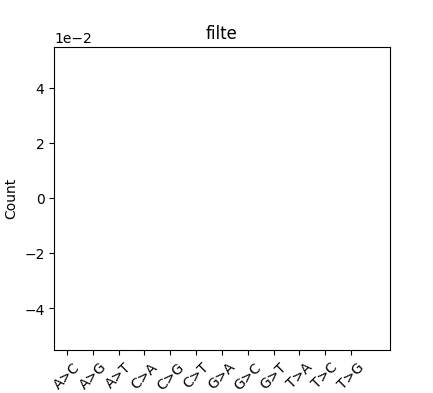

In [ ]:
from IPython.display import Image
Image('/content/outputs/substitutions.0.png')

# Скачаем полученные результаты.

In [ ]:
!zip -r /content/file.zip /content/outputs

  adding: content/outputs/ (stored 0%)
  adding: content/outputs/bowtie/ (stored 0%)
  adding: content/outputs/bowtie/bowtie_ref.4.bt2 (deflated 7%)
  adding: content/outputs/bowtie/bowtie_ref.1.bt2 (deflated 20%)
  adding: content/outputs/bowtie/.ipynb_checkpoints/ (stored 0%)
  adding: content/outputs/bowtie/bowtie_ref.3.bt2 (deflated 54%)
  adding: content/outputs/bowtie/bowtie_ref.rev.2.bt2 (deflated 0%)
  adding: content/outputs/bowtie/bowtie_bam/ (stored 0%)
  adding: content/outputs/bowtie/bowtie_bam/bowtie_bam_sorted (deflated 0%)
  adding: content/outputs/bowtie/bowtie_bam/bowtie_bam (deflated 0%)
  adding: content/outputs/bowtie/bowtie_ref.2.bt2 (deflated 0%)
  adding: content/outputs/bowtie/bowtie_ref.rev.1.bt2 (deflated 20%)
  adding: content/outputs/bowtie/bowtie_ref/ (stored 0%)
  adding: content/outputs/bowtie/bowtie_ref/raw.bcf (stored 0%)
  adding: content/outputs/bowtie/bowtie_ref/calls.bcf (stored 0%)
  adding: content/outputs/samtools/ (stored 0%)
  adding: content/

In [ ]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>